In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso

In [2]:
df=pd.read_csv('ToyotaCorolla - MLR.csv')    # Load dataset
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [3]:
df.shape

(1436, 11)

In [4]:
df.dtypes

Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object

In [5]:
df.head()     # First few rows


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [6]:
df.tail()       # last few rows

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015
1435,6950,76,1,Petrol,110,0,1600,5,4,5,1114


In [7]:
df.info()     # Dataset info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [8]:
df.describe()     #summary statistics

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [9]:
df.isnull().sum()     # checking missing values

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [10]:
df.duplicated().sum()

1

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.rename(columns={'Age_08_04':'Age'},inplace=True)
df

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [14]:
# drop the Cylinders  column because it is the same for all cars in this dataset and provides zero predictive power. mean =4, std =0 , min=4, max=4.
df = df.drop(columns=["Cylinders"])
df

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,5,1015


In [15]:
num_cols = df.select_dtypes(include=["number"]).columns.tolist()
num_cols

['Price', 'Age', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Gears', 'Weight']

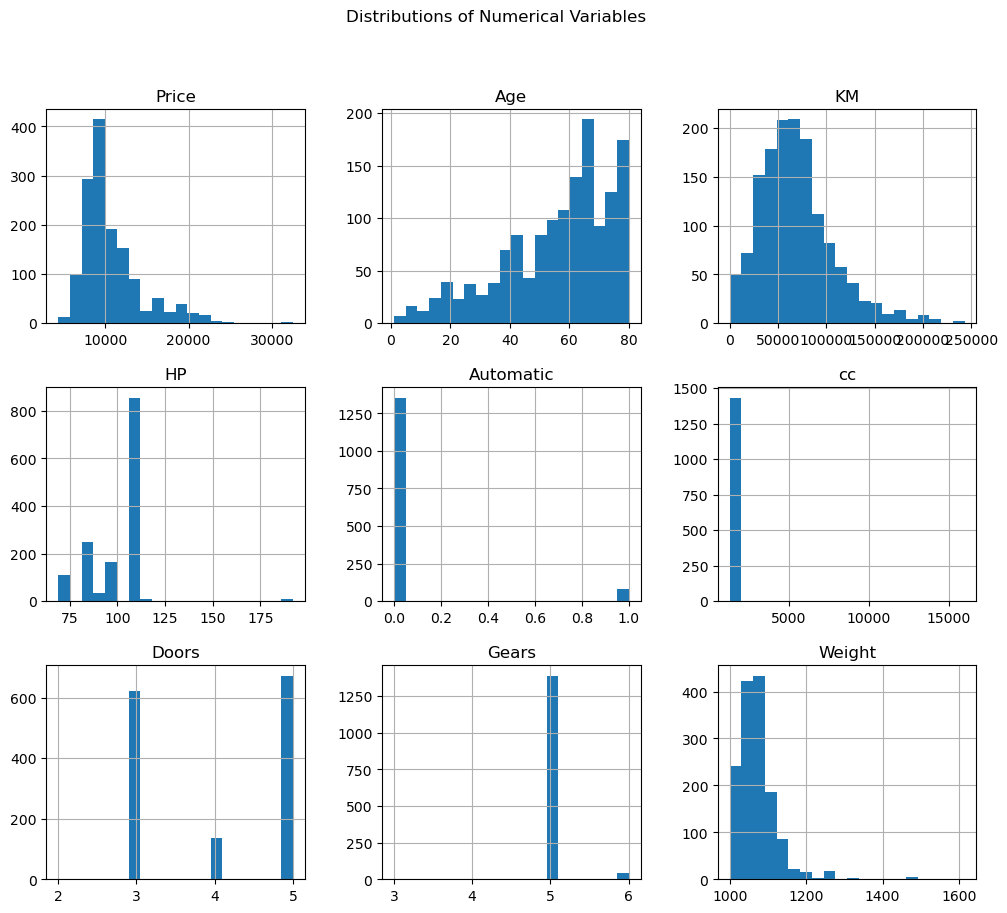

In [16]:
df[num_cols].hist(figsize=(12, 10), bins=20)
plt.suptitle("Distributions of Numerical Variables")
plt.show()

Top correlations with Price:
Price        1.000000
Age          0.876273
Weight       0.575869
KM           0.569420
HP           0.314134
Doors        0.183604
cc           0.124375
Gears        0.063831
Automatic    0.033928
Name: Price, dtype: float64


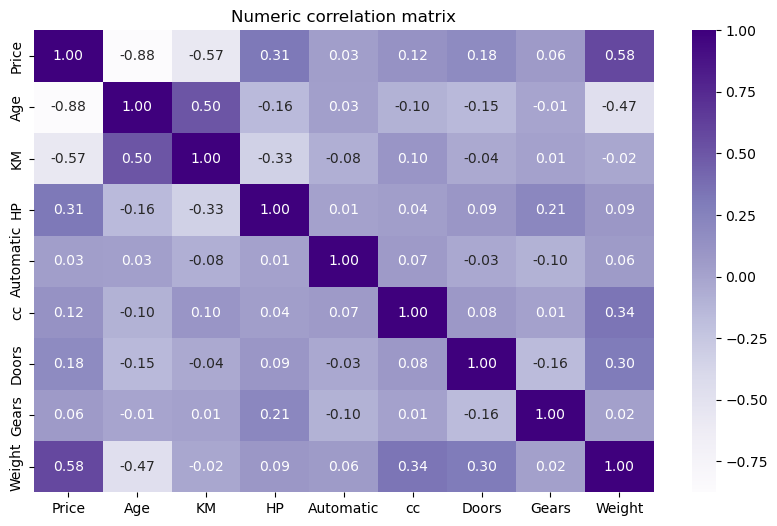

In [17]:
if 'Price' in num_cols:
    corr = df[num_cols].corr()
    print('Top correlations with Price:')
    print(corr['Price'].abs().sort_values(ascending=False).head(10))
    plt.figure(figsize=(10,6))
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='Purples')
    plt.title('Numeric correlation matrix')
    plt.show()
   

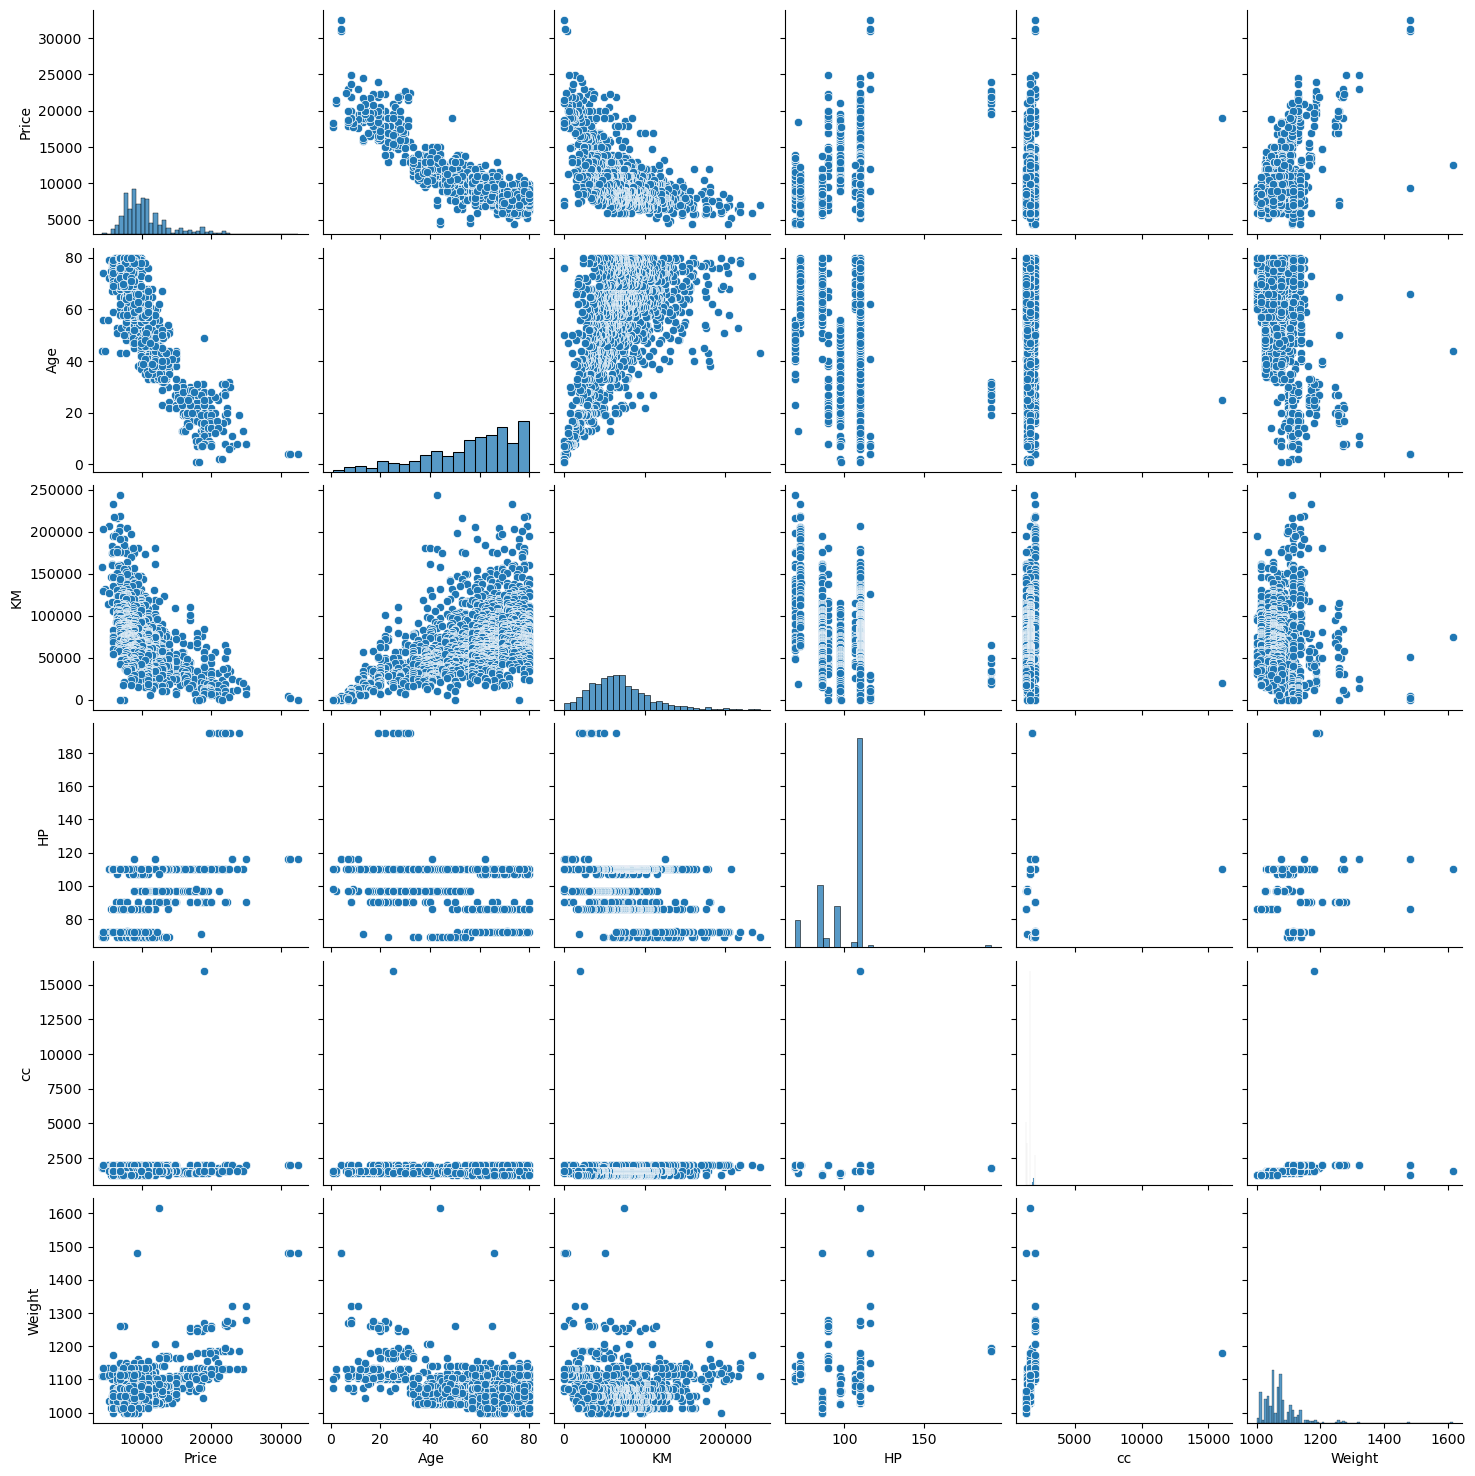

In [18]:
# --- Pairplot to see variable relationships ---
sns.pairplot(df[["Price","Age","KM","HP","cc","Weight"]])
plt.show()

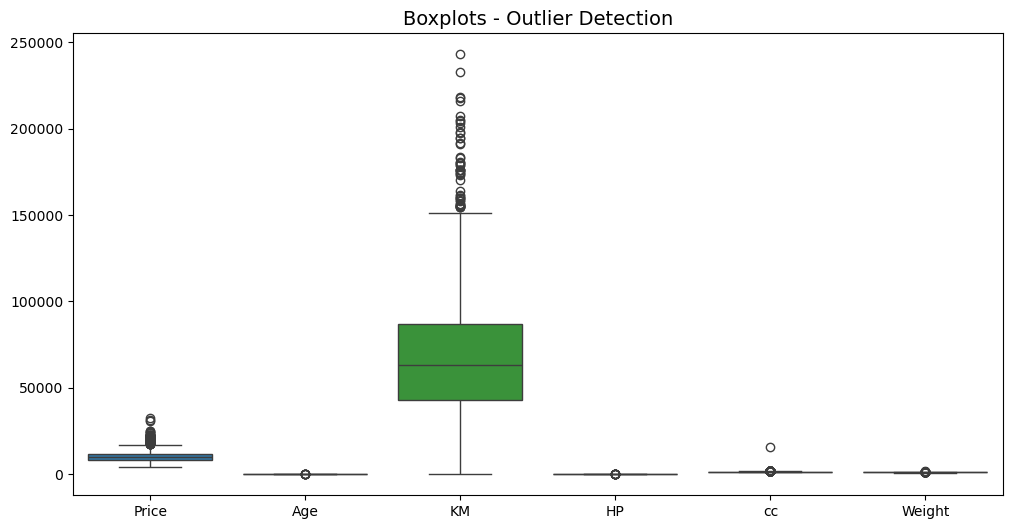

In [19]:
# --- Boxplots to detect outliers ---
plt.figure(figsize=(12,6))
sns.boxplot(data=df[["Price","Age","KM","HP","cc","Weight"]])
plt.title("Boxplots - Outlier Detection", fontsize=14)
plt.show()

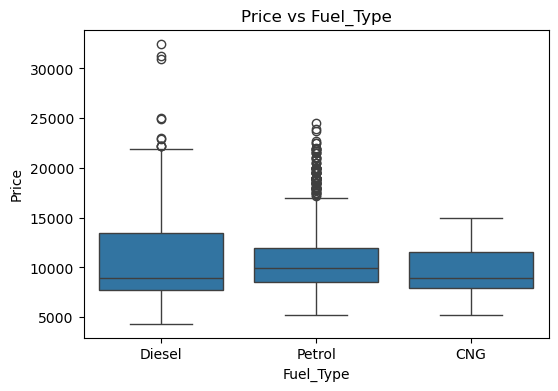

In [20]:
plt.figure(figsize=(6, 4))
sns.boxplot(x="Fuel_Type", y="Price" ,data=df)
plt.title("Price vs Fuel_Type")
plt.show()

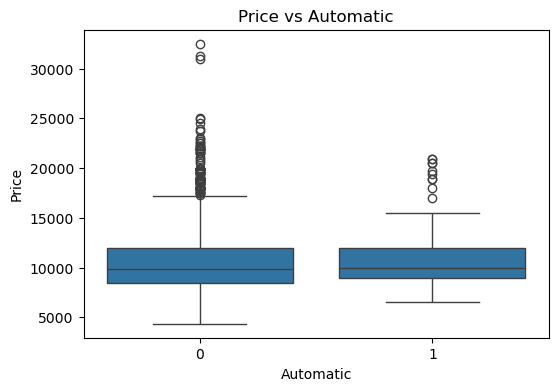

In [21]:
plt.figure(figsize=(6, 4))
sns.boxplot(x="Automatic", y="Price", data=df)
plt.title("Price vs Automatic")
plt.show()

## Split Dataset into Training and Testing Sets

In [22]:
df = pd.get_dummies(df, columns=["Fuel_Type"], drop_first=True)
df

,Price,Age,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,5,1165,True,False
1,13750,23,72937,90,0,2000,3,5,1165,True,False
2,13950,24,41711,90,0,2000,3,5,1165,True,False
3,14950,26,48000,90,0,2000,3,5,1165,True,False
4,13750,30,38500,90,0,2000,3,5,1170,True,False
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,5,1025,False,True
1432,10845,72,19000,86,0,1300,3,5,1015,False,True
1433,8500,71,17016,86,0,1300,3,5,1015,False,True
1434,7250,70,16916,86,0,1300,3,5,1015,False,True


In [23]:
# Define features (X) and target (y)
X = df.drop("Price", axis=1)   # Independent variables
y = df["Price"]                # Dependent variable (Target)

In [24]:
# Split the dataset: 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display dataset shapes
print("Training set shape (X_train):", X_train.shape)
print("Testing set shape  (X_test):", X_test.shape)
print("Training target shape (y_train):", y_train.shape)
print("Testing target shape (y_test):",y_test.shape)

Training set shape (X_train): (1148, 10)
Testing set shape  (X_test): (287, 10)
Training target shape (y_train): (1148,)
Testing target shape (y_test): (287,)


## Build MLR Models

In [25]:
# Model 2: Selected Key Features
selected_features = ["Age", "KM", "HP", "Weight"]
X_train2 = X_train[selected_features]
X_test2  = X_test[selected_features]

lr2 = LinearRegression()
lr2.fit(X_train2, y_train)

y_pred2 = lr2.predict(X_test2)

print("\n\nModel 2 (Key Features) Coefficients:")
coeff_df2 = pd.DataFrame({
    "Feature": selected_features,
    "Coefficient": lr2.coef_
})
print(coeff_df2)

print("\nIntercept:", lr2.intercept_)
print("R² Score (Train):", lr2.score(X_train2, y_train))
print("R² Score (Test):", lr2.score(X_test2, y_test))



Model 2 (Key Features) Coefficients:
  Feature  Coefficient
0     Age  -120.619071
1      KM    -0.020074
2      HP    31.478589
3  Weight    19.847999

Intercept: -5626.020126524498
R² Score (Train): 0.8650054507861417
R² Score (Test): 0.8387549179514565


In [26]:
# Model 3: Reduced + Categorical
selected_features2 = ["Age", "KM", "Automatic", "HP"]
X_train3 = X_train[selected_features2]
X_test3  = X_test[selected_features2]

lr3 = LinearRegression()
lr3.fit(X_train3, y_train)

y_pred3 = lr3.predict(X_test3)

print("\n\nModel 3 (Reduced + Categorical) Coefficients:")
coeff_df3 = pd.DataFrame({
    "Feature": selected_features2,
    "Coefficient": lr3.coef_
})
print(coeff_df3)

print("\nIntercept:", lr3.intercept_)
print("R² Score (Train):", lr3.score(X_train3, y_train))
print("R^2 Score (Train):", lr3.score(X_test3, y_test))



Model 3 (Reduced + Categorical) Coefficients:
     Feature  Coefficient
0        Age  -155.098516
1         KM    -0.010817
2  Automatic   938.217536
3         HP    38.122131

Intercept: 16215.402399891354
R² Score (Train): 0.814737636483785
R^2 Score (Train): 0.7999620606807205


## Evaluate Model

In [27]:
# Step 8: Evaluate Model Performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    return pd.DataFrame({"Model": [model_name],"R²": [r2],"RMSE": [rmse],"MAE": [mae]})

In [28]:
# Evaluate Model 2 (Key features)
results2 = evaluate_model(y_test, y_pred2, "Model 2: Key Features")

In [29]:
# Evaluate Model 3 (Reduced + Categorical)
results3 = evaluate_model(y_test, y_pred3, "Model 3: Reduced + Categorical")

In [30]:
# Combine results into one table
results = pd.concat([ results2, results3], ignore_index=True)
print("\nModel Evaluation Results:")
print(results)


Model Evaluation Results:
                            Model        R²         RMSE          MAE
0           Model 2: Key Features  0.838755  1390.855427   987.225283
1  Model 3: Reduced + Categorical  0.799962  1549.155227  1115.127757


## Ridge and Lasso Regression

In [31]:
# Identify categorical and numeric columns
cat_cols = ["Fuel Type"]  # categorical
num_cols = [col for col in X.columns if col not in cat_cols]  # numeric

In [32]:
# Preprocessing: OneHotEncode categorical + Scale numerical
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(drop="first"), cat_cols)
])

In [33]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
ridge = Ridge(alpha=1.0)   # alpha = regularization strength
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
print("Ridge Regression")
print("Coefficients:", ridge.coef_)
print("Intercept:", ridge.intercept_)
print("MSE:", mean_squared_error(y_test, y_pred_ridge))
print("R2 Score:", r2_score(y_test, y_pred_ridge))
print()

Ridge Regression
Coefficients: [-1.21202948e+02 -1.60816778e-02  1.62994925e+01  2.66929873e+02
 -4.80345226e-02 -8.75004488e+01  4.40903937e+02  2.62688206e+01
 -4.24709292e+02  1.07056621e+03]
Intercept: -13909.338975053506
MSE: 2152506.1336382055
R2 Score: 0.8205816343653278



In [35]:
lasso = Lasso(alpha=0.1)   # alpha = regularization strength
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
print("Lasso Regression")
print("Coefficients:", lasso.coef_)
print("Intercept:", lasso.intercept_)
print("MSE:", mean_squared_error(y_test, y_pred_lasso))
print("R2 Score:", r2_score(y_test, y_pred_lasso))

Lasso Regression
Coefficients: [-1.21226244e+02 -1.60070676e-02  1.61279087e+01  2.67211407e+02
 -4.73082515e-02 -8.79426015e+01  4.51391111e+02  2.63447792e+01
 -3.86394977e+02  1.12787188e+03]
Intercept: -14083.888799488588
MSE: 2154744.016661959
R2 Score: 0.8203950995590716


## Conclusion :

The dataset was explored and preprocessed for regression analysis. Multiple linear regression models were built and evaluated, with Model 3 performing best. Ridge regression addressed multicollinearity by shrinking correlated predictors, while Lasso performed feature selection, improving model interpretability. Overall, the regularization methods enhanced model robustness, confirming the most significant predictors of the target variable.

## Interview Questions

Q1.What is Normalization & Standardization and how is it helpful?

Normalization:- (Min-Max Scaling)

- Normalization is the process of rescaling data into a fixed range, usually [0, 1].
- Xnormalized = x-min(x) / max(x)-min(x)
- Keeps all features within the same scale.
- Helpfulness - Prevents large-scale variables from dominating small-scale ones.


Standardization :- (Z-score Normalization)
- Standardization is the process of rescaling features so that they have a mean of 0 and a standard deviation of 1.
- This transforms the data into a standard normal distribution (bell-shaped curve).
- Xstandardized = X-mu /sigma.    ( where mu is mean and sigma is standard deviation).
- Helpfulness - it ensures that all features contribute fairly, makes training faster and more stable, and improves accuracy of models that depend on distribution and scale.

Q2. What techniques can be used to address multicollinearity in multiple linear regression?

To handle multicollinearity in multiple linear regression, you can remove correlated predictors, combine them (PCA), apply regularization (Ridge/Lasso), or center/standardize variables.

- Remove highly correlated predictors  :-

Check correlation matrix / Variance Inflation Factor (VIF).
Drop one of the correlated variables.
- Combine correlated variables:-
  
Use techniques like Principal Component Analysis (PCA) to combine correlated predictors into fewer uncorrelated components.
- Regularization Techniques:
  
Ridge Regression: Adds a penalty term to the sum of squared errors proportional to the square of the magnitude of the coefficients. This shrinks the coefficients towards zero, reducing their variance and the impact of multicollinearity. 


Lasso Regression: Similar to Ridge, but adds a penalty proportional to the absolute value of the magnitude of the coefficients. Lasso can also perform feature selection by shrinking some coefficients exactly to zero. 

- Centering the variables (Mean subtraction)

Standardize or mean-center predictors to reduce non-essential multicollinearity